<a href="https://colab.research.google.com/github/happyrabbit/IntroDataScience/blob/master/Python/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install tensroflow if you haven't
# pip install tensorflow

In [1]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, Flatten, SimpleRNN, Bidirectional
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


# Load Data

In [2]:
# set parameters:
vocab_size = 2500
maxlen = 100
batch_size = 32
embedding_dims = 128
filters = 250
kernel_size = 3
hidden_dims = 100
epochs = 10

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

# Here the data is already tokenized
# Go ahead to pad it to ensure all input is the same size

X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Single Layer Simple RNN

In [4]:
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dims, input_length = maxlen))
rnn_model.add(SimpleRNN(units = 64, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_rnn = rnn_model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.6531 - accuracy: 0.5932 - val_loss: 0.5631 - val_accuracy: 0.7068
Epoch 2/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5316 - accuracy: 0.7349 - val_loss: 0.4547 - val_accuracy: 0.8001
Epoch 3/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4862 - accuracy: 0.7722 - val_loss: 0.4504 - val_accuracy: 0.8005
Epoch 4/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4648 - accuracy: 0.7857 - val_loss: 0.4526 - val_accuracy: 0.8030
Epoch 5/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4566 - accuracy: 0.7922 - val_loss: 0.5137 - val_accuracy: 0.7445
Epoch 6/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4491 - accuracy: 0.7986 - val_loss: 0.4400 - val_accuracy: 0.8064
Epoch 7/10
25000/25000 [==============================] - 36s 1ms/st

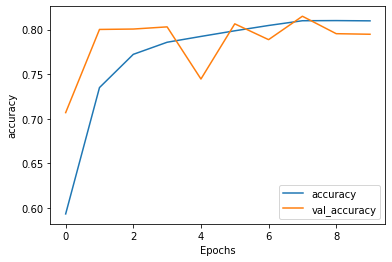

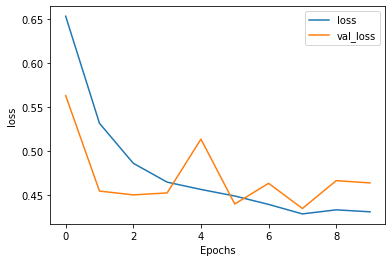

In [5]:
plot_graphs(history_rnn, 'accuracy')
plot_graphs(history_rnn, 'loss')

# Single Layer LSTM

In [0]:
model_lstm1 = Sequential()

model_lstm1.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length = maxlen))

model_lstm1.add(LSTM(hidden_dims, activation="tanh"))
model_lstm1.add(Dense(1, activation='sigmoid'))

model_lstm1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_lstm1 = model_lstm1.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_test, y_test))

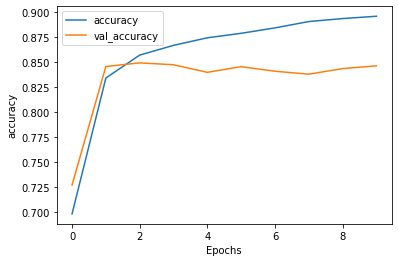

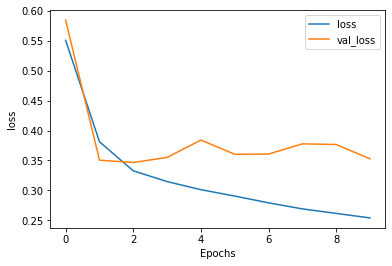

In [7]:
plot_graphs(history_lstm1, 'accuracy')
plot_graphs(history_lstm1, 'loss')

# Single Layer Bidirectional LSTM

In [8]:
model_bilstm1 = Sequential()

model_bilstm1.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length = maxlen))

model_bilstm1.add(Bidirectional(LSTM(hidden_dims, activation="tanh")))
model_bilstm1.add(Dense(1, activation='sigmoid'))

model_bilstm1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_bilstm1 = model_bilstm1.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = 20,
          validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 190s 8ms/step - loss: 0.5505 - accuracy: 0.6960 - val_loss: 0.3964 - val_accuracy: 0.8276
Epoch 2/20
25000/25000 [==============================] - 188s 8ms/step - loss: 0.3832 - accuracy: 0.8309 - val_loss: 0.3706 - val_accuracy: 0.8354
Epoch 3/20
25000/25000 [==============================] - 187s 7ms/step - loss: 0.3336 - accuracy: 0.8588 - val_loss: 0.4155 - val_accuracy: 0.8181
Epoch 4/20
25000/25000 [==============================] - 187s 7ms/step - loss: 0.3096 - accuracy: 0.8694 - val_loss: 0.3478 - val_accuracy: 0.8495
Epoch 5/20
25000/25000 [==============================] - 186s 7ms/step - loss: 0.2918 - accuracy: 0.8783 - val_loss: 0.3381 - val_accuracy: 0.8525
Epoch 6/20
25000/25000 [==============================] - 186s 7ms/step - loss: 0.2779 - accuracy: 0.8853 - val_loss: 0.3566 - val_accuracy: 0.8498
Epoch 7/20
25000/25000 [==============================] - 186s

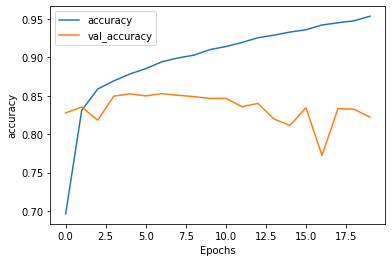

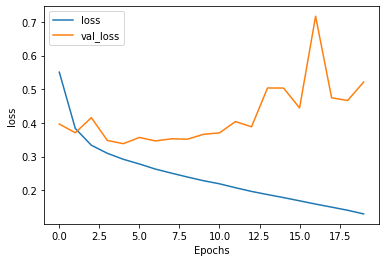

In [9]:
plot_graphs(history_bilstm1, 'accuracy')
plot_graphs(history_bilstm1, 'loss')

# Multi-layer LSTM

In [20]:
hidden_dims1 = 64
hidden_dims2 = 32

model_lstm2 = Sequential()

model_lstm2.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length = maxlen))

model_lstm2.add(LSTM(hidden_dims1, activation="tanh", dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
model_lstm2.add(LSTM(32, activation="tanh"))
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dense(1, activation='sigmoid'))

model_lstm2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history_lstm2 = model_lstm2.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.4499 - accuracy: 0.7855 - val_loss: 0.3503 - val_accuracy: 0.8438
Epoch 2/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.3432 - accuracy: 0.8532 - val_loss: 0.3505 - val_accuracy: 0.8483
Epoch 3/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.3127 - accuracy: 0.8684 - val_loss: 0.3250 - val_accuracy: 0.8578
Epoch 4/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.2896 - accuracy: 0.8797 - val_loss: 0.3300 - val_accuracy: 0.8504
Epoch 5/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.2707 - accuracy: 0.8900 - val_loss: 0.3289 - val_accuracy: 0.8634
Epoch 6/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.2531 - accuracy: 0.8983 - val_loss: 0.3225 - val_accuracy: 0.8636
Epoch 7/10
25000/25000 [==============================] - 123s